# Load libraries

In [2]:
import pandas as pd ##
import numpy as np ##
import seaborn as sns ## plotting
import matplotlib.pyplot as plt ## # plotting
import os
import missingno


In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install plotly

In [4]:
!pip install missingno

In [5]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


# Read file

In [3]:
data_path = "C:/Users/gebruiker/Documents/Sanne/UM GZW/Master Systems Biology/MSB1015 Scientific Programming/Project/MSB1015-SV-1/Data/Alzheimer_Disease_Healthy_Aging_Data.csv"

if not os.path.exists(data_path):
    raise FileNotFoundError(
        f"Dataset not found at {data_path}. "
        "Please manually place the dataset in the 'data/' folder (do not upload it to GitHub)."
    )

Alzheimers = pd.read_csv(data_path)
print("Dataset successfully loaded:", Alzheimers.shape)


C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\730371778.py:9: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  Alzheimers = pd.read_csv(data_path)


Dataset successfully loaded: (250937, 16)


# Data explore

In [4]:
# Let´s see the dataset
Alzheimers 

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
0,BRFSS~2021~2021~9004~Q43~TOC11~AGE~RACE,2021,2021,WEST,West,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,28.8,34.4,Percentage,31.6,NaN,NaN,Hispanic,NaN
1,BRFSS~2017~2017~9001~Q43~TOC11~AGE~OVERALL,2017,2017,NRE,Northeast,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,49.1,51.6,Percentage,50.3,65 years or older,NaN,NaN,NaN
2,BRFSS~2019~2019~9002~Q02~TNC02~AGE~OVERALL,2019,2019,MDW,Midwest,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,13.8,14.8,Percentage,14.3,NaN,NaN,NaN,NaN
3,BRFSS~2020~2020~59~Q43~TOC11~AGE~GENDER,2020,2020,US,"United States, DC & Territories",Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,54.5,56.4,Percentage,55.5,65 years or older,Female,NaN,NaN
4,BRFSS~2020~2020~33~Q03~TMC01~AGE~GENDER,2020,2020,NH,New Hampshire,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,12.8,18,Percentage,15.2,50-64 years,Female,NaN,POINT (-71.50036091999965 43.65595011300047)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250932,BRFSS~2015~2015~54~Q30~TCC01~AGE~RACE,2015,2015,WV,West Virginia,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,NaN,NaN,Percentage,NaN,NaN,NaN,Asian/Pacific Islander,POINT (-80.71264013499967 38.66551020200046)
250933,BRFSS~2015~2015~40~Q35~TOC03~AGE~RACE,2015,2015,OK,Oklahoma,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,4.7,9.6,Mean,7.1,50-64 years,NaN,"Black, non-Hispanic",POINT (-97.52107021399968 35.47203135600046)
250934,BRFSS~2017~2017~33~Q44~TOC12~AGE~OVERALL,2017,2017,NH,New Hampshire,Overall Health,Severe joint pain among older adults with arth...,Severe joint pain due to arthritis among older...,19.5,24.5,Percentage,21.9,NaN,NaN,NaN,POINT (-71.50036091999965 43.65595011300047)
250935,BRFSS~2015~2015~51~Q39~TGC04~AGE~RACE,2015,2015,VA,Virginia,Caregiving,Intensity of caregiving among older adults,Average of 20 or more hours of care per week p...,NaN,NaN,Percentage,NaN,65 years or older,NaN,Hispanic,POINT (-78.45789046299967 37.54268067400045)


In [5]:
Alzheimers.describe()

,YearStart,YearEnd,Data_Value
count,250937.000000,250937.000000,169302.000000
mean,2017.940933,2018.169716,37.328349
std,2.031564,2.081039,25.213181
min,2015.000000,2015.000000,0.000000
25%,2016.000000,2016.000000,15.700000
50%,2018.000000,2018.000000,32.300000
75%,2020.000000,2020.000000,56.000000
max,2021.000000,2021.000000,100.000000


In [6]:
Alzheimers.dtypes

RowId                     object
YearStart                  int64
YearEnd                    int64
LocationAbbr              object
LocationDesc              object
Class                     object
Topic                     object
Question                  object
Low_Confidence_Limit      object
High_Confidence_Limit     object
Data_Value_Type           object
Data_Value               float64
Age                       object
Gender                    object
Ethnicity                 object
Geolocation               object
dtype: object

In [ ]:
# let's change some columns to numeric
Alzheimers['High_Confidence_Limit'] = pd.to_numeric(Alzheimers['High_Confidence_Limit'], errors='coerce')
Alzheimers['Low_Confidence_Limit'] = pd.to_numeric(Alzheimers['Low_Confidence_Limit'], errors='coerce')
Alzheimers['Age'] = Alzheimers['Age'].astype('category')
Alzheimers.describe()

,YearStart,YearEnd,Low_Confidence_Limit,High_Confidence_Limit,Data_Value
count,250937.000000,250937.000000,169126.000000,169126.000000,169302.000000
mean,2017.940933,2018.169716,32.698188,42.243840,37.328349
std,2.031564,2.081039,24.288904,26.165896,25.213181
min,2015.000000,2015.000000,-0.700000,1.400000,0.000000
25%,2016.000000,2016.000000,12.400000,19.400000,15.700000
50%,2018.000000,2018.000000,26.600000,38.300000,32.300000
75%,2020.000000,2020.000000,48.400000,64.000000,56.000000
max,2021.000000,2021.000000,99.600000,100.000000,100.000000


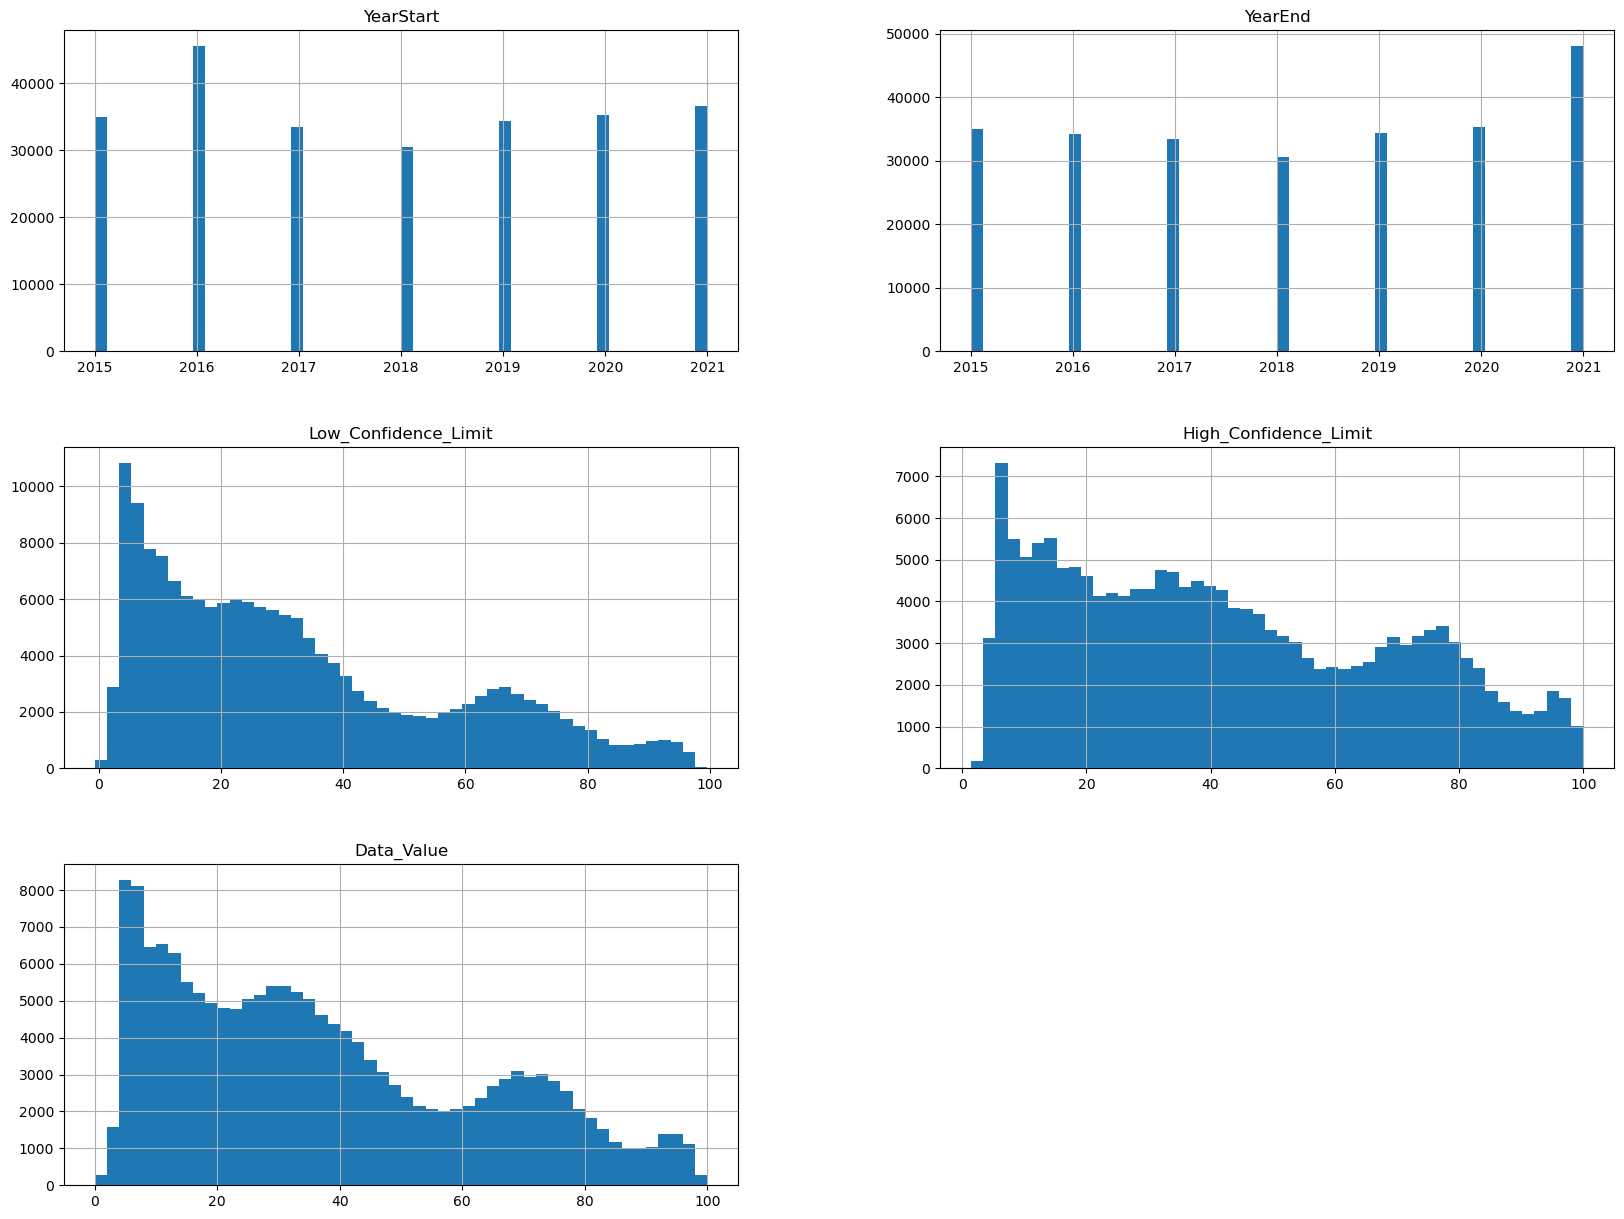

In [8]:
Alzheimers.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
Alzheimers.Class.value_counts()

Class
Overall Health                         84091
Screenings and Vaccines                52297
Nutrition/Physical Activity/Obesity    30376
Caregiving                             24427
Cognitive Decline                      21015
Mental Health                          19366
Smoking and Alcohol Use                19365
Name: count, dtype: int64

In [10]:
for col in Alzheimers.columns:
    print(f"Value counts voor kolom: {col}")
    print(Alzheimers[col].value_counts())
    print("-" * 40)

Value counts voor kolom: RowId
RowId
BRFSS~2021~2021~9004~Q43~TOC11~AGE~RACE     15
BRFSS~2015~2015~08~Q17~TAC01~AGE~RACE       15
BRFSS~2016~2016~09~Q33~TOC08~AGE~RACE       15
BRFSS~2019~2019~42~Q17~TAC01~AGE~RACE       15
BRFSS~2019~2019~17~Q43~TOC11~AGE~RACE       15
                                            ..
BRFSS~2019~2019~38~Q02~TNC02~AGE~OVERALL     3
BRFSS~2016~2016~29~Q12~TSC01~AGE~OVERALL     3
BRFSS~2017~2017~37~Q19~TSC04~AGE~OVERALL     3
BRFSS~2017~2017~25~Q43~TOC11~AGE~OVERALL     3
BRFSS~2018~2018~54~Q12~TSC01~AGE~OVERALL     3
Name: count, Length: 31676, dtype: int64
----------------------------------------
Value counts voor kolom: YearStart
YearStart
2016    45627
2021    36649
2020    35310
2015    35020
2019    34354
2017    33429
2018    30548
Name: count, dtype: int64
----------------------------------------
Value counts voor kolom: YearEnd
YearEnd
2021    48131
2020    35310
2015    35020
2019    34354
2016    34145
2017    33429
2018    30548
Name: count, dt

## Checking missing values

Conclusion: We see a lot of missing values, especially in columns: Age and Gender.
I think the missing values has to do with the structure of the file. There is not really a need to impute, since it just needs stratification (spoiler :)
In this file, I try to predict the missing Age values. 


In [11]:
Alzheimers.isnull().sum()

RowId                         0
YearStart                     0
YearEnd                       0
LocationAbbr                  0
LocationDesc                  0
Class                         0
Topic                         0
Question                      0
Low_Confidence_Limit      81811
High_Confidence_Limit     81811
Data_Value_Type               0
Data_Value                81635
Age                       84147
Gender                   190385
Ethnicity                 92928
Geolocation               26709
dtype: int64

In [12]:
missing_percent = Alzheimers.isnull().mean() * 100

# Filter kolommen met meer dan 30% missende waarden
columns_above_30 = missing_percent[missing_percent > 30]

# Toon de kolomnamen en hun missings-percentage
print(columns_above_30)

Low_Confidence_Limit     32.602207
High_Confidence_Limit    32.602207
Data_Value               32.532070
Age                      33.533118
Gender                   75.869641
Ethnicity                37.032403
dtype: float64


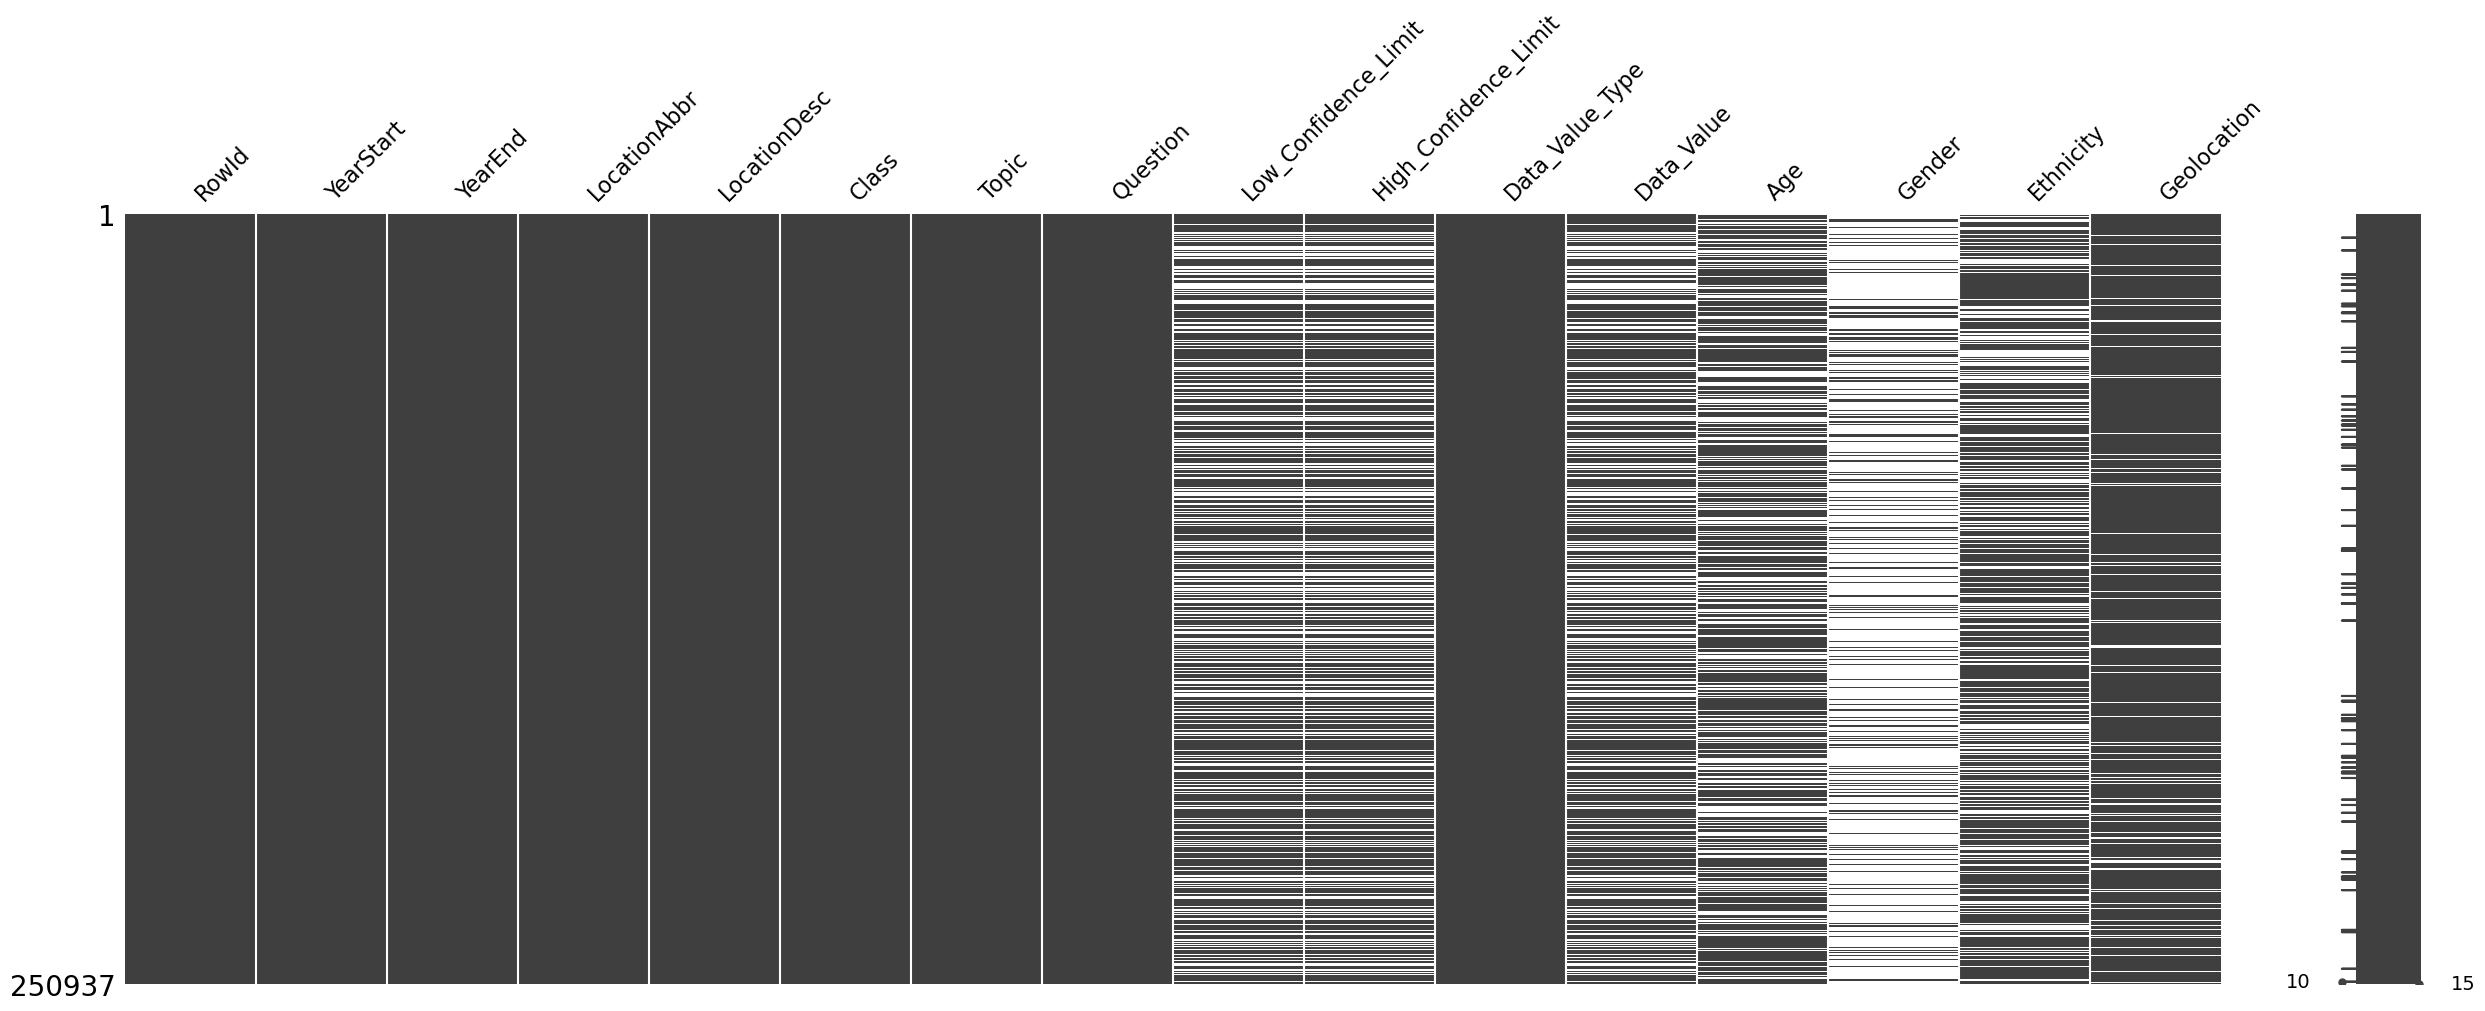

In [13]:
missingno.matrix(Alzheimers, figsize = (30,10))
plt.show()

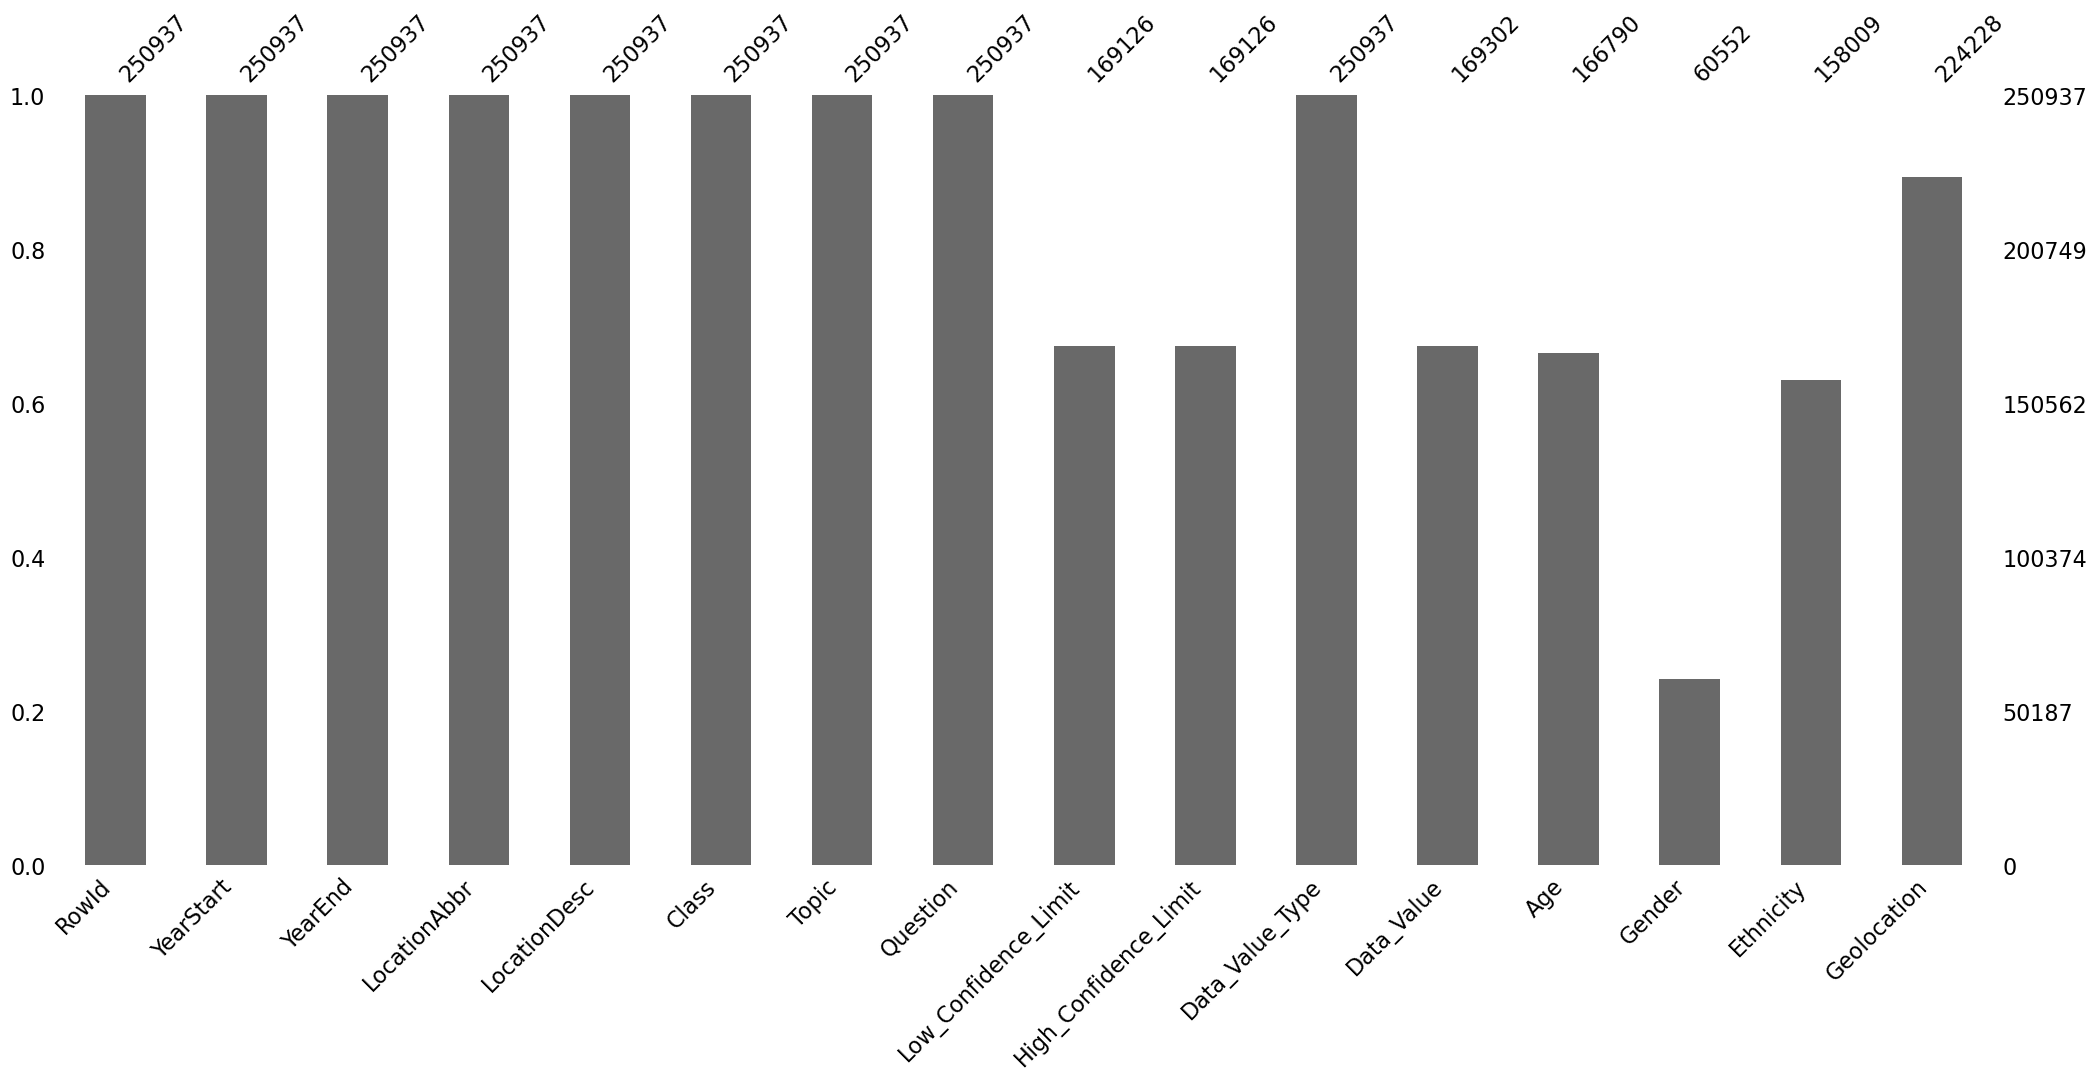

In [14]:
missingno.bar(Alzheimers)
plt.show()

## Look at distribution of Question IDs

In [19]:
# Make a mapping of unique questions to QIDs
unique_questions = Alzheimers['Question'].drop_duplicates().reset_index(drop=True)
qid_map = {question: f"Q{i+1}" for i, question in enumerate(unique_questions)}

# Add QID column to the dataframe
Alzheimers['QID'] = Alzheimers['Question'].map(qid_map)
Alzheimers.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation,QID
0,BRFSS~2021~2021~9004~Q43~TOC11~AGE~RACE,2021,2021,WEST,West,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,28.8,34.4,Percentage,31.6,NaN,NaN,Hispanic,NaN,Q1
1,BRFSS~2017~2017~9001~Q43~TOC11~AGE~OVERALL,2017,2017,NRE,Northeast,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,49.1,51.6,Percentage,50.3,65 years or older,NaN,NaN,NaN,Q1
2,BRFSS~2019~2019~9002~Q02~TNC02~AGE~OVERALL,2019,2019,MDW,Midwest,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,13.8,14.8,Percentage,14.3,NaN,NaN,NaN,NaN,Q2
3,BRFSS~2020~2020~59~Q43~TOC11~AGE~GENDER,2020,2020,US,"United States, DC & Territories",Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,54.5,56.4,Percentage,55.5,65 years or older,Female,NaN,NaN,Q1
4,BRFSS~2020~2020~33~Q03~TMC01~AGE~GENDER,2020,2020,NH,New Hampshire,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,12.8,18.0,Percentage,15.2,50-64 years,Female,NaN,POINT (-71.50036091999965 43.65595011300047),Q3


QID                                                                                                                                                                  Question
 Q1                                                                                                                  Percentage of older adults ever told they have arthritis
 Q2                                                                                                      Percentage of older adults who are eating 3 or more vegetables daily
 Q3                                                                                                  Percentage of older adults who are experiencing frequent mental distress
 Q4                                                                                                           Mean number of days with activity limitations in the past month
 Q5                                                                                            Percentage of older adults who repo

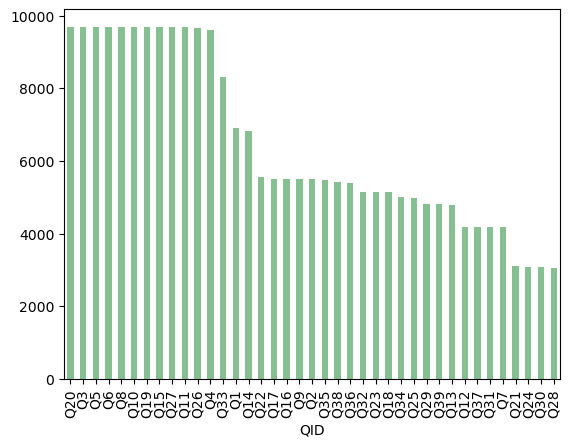

In [ ]:
#distribution of Question IDs
Alzheimers['QID'].value_counts().plot(kind='bar', color='#86bf91')
unique_pairs = Alzheimers.drop_duplicates(subset=['QID', 'Question'])
selected_columns = unique_pairs[['QID', 'Question']]
print(selected_columns.to_string(index=False))
plt.show()

## Now, we can look at distibutions per Question ID and country of the data_value

In [17]:
filter_set = ['QID', 'Question', 'Data_Value', 'Data_Value_Type', 'Age', 'Ethnicity','Gender', 'LocationAbbr']
filtered_dataset = Alzheimers[filter_set]
available_data = filtered_dataset[filtered_dataset['Data_Value'].notna()]
available_data

,QID,Question,Data_Value,Data_Value_Type,Age,Ethnicity,Gender,LocationAbbr
0,Q1,Percentage of older adults ever told they have...,31.6,Percentage,NaN,Hispanic,NaN,WEST
1,Q1,Percentage of older adults ever told they have...,50.3,Percentage,65 years or older,NaN,NaN,NRE
2,Q2,Percentage of older adults who are eating 3 or...,14.3,Percentage,NaN,NaN,NaN,MDW
3,Q1,Percentage of older adults ever told they have...,55.5,Percentage,65 years or older,NaN,Female,US
4,Q3,Percentage of older adults who are experiencin...,15.2,Percentage,50-64 years,NaN,Female,NH
...,...,...,...,...,...,...,...,...
250930,Q3,Percentage of older adults who are experiencin...,14.1,Percentage,50-64 years,NaN,Female,NJ
250931,Q4,Mean number of days with activity limitations ...,8.4,Mean,NaN,NaN,Male,OK
250933,Q4,Mean number of days with activity limitations ...,7.1,Mean,50-64 years,"Black, non-Hispanic",NaN,OK
250934,Q38,Severe joint pain due to arthritis among older...,21.9,Percentage,NaN,NaN,NaN,NH


C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


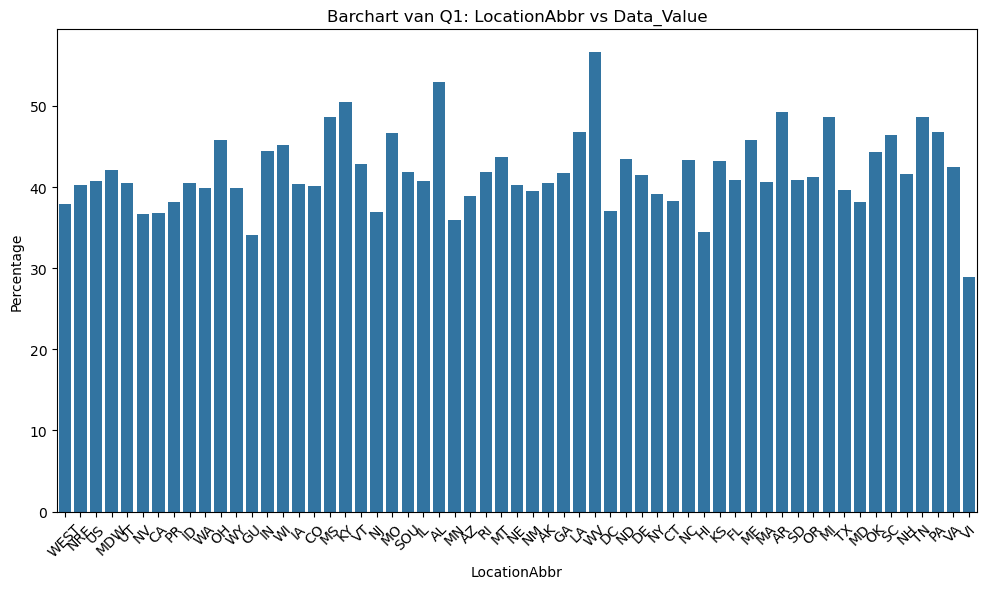

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


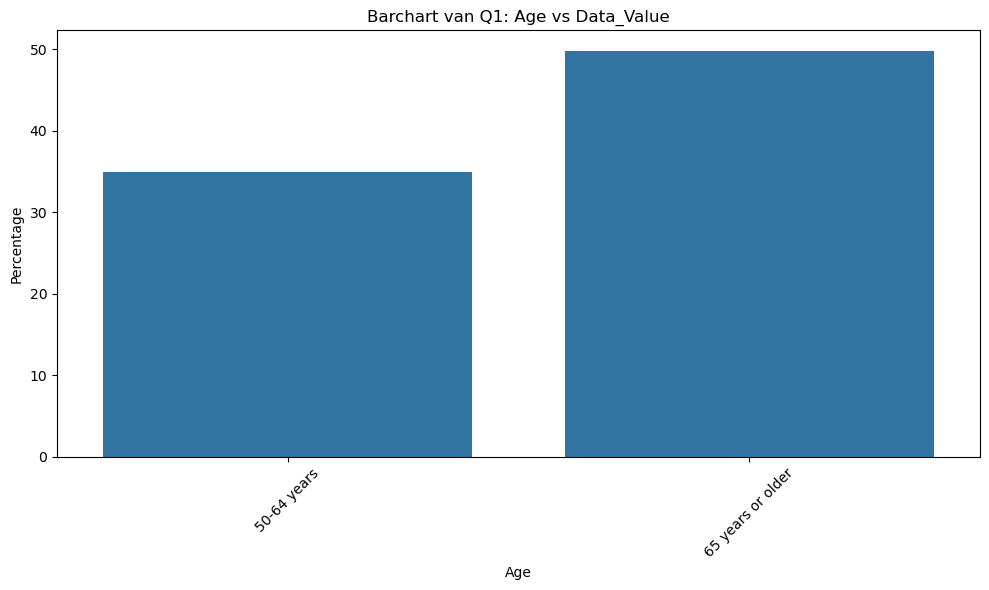

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


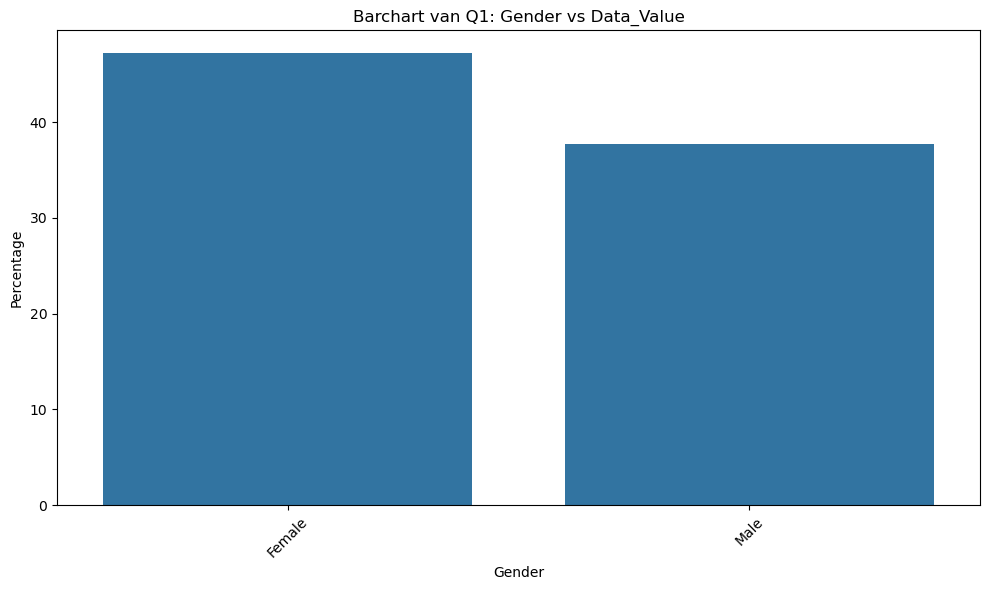

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


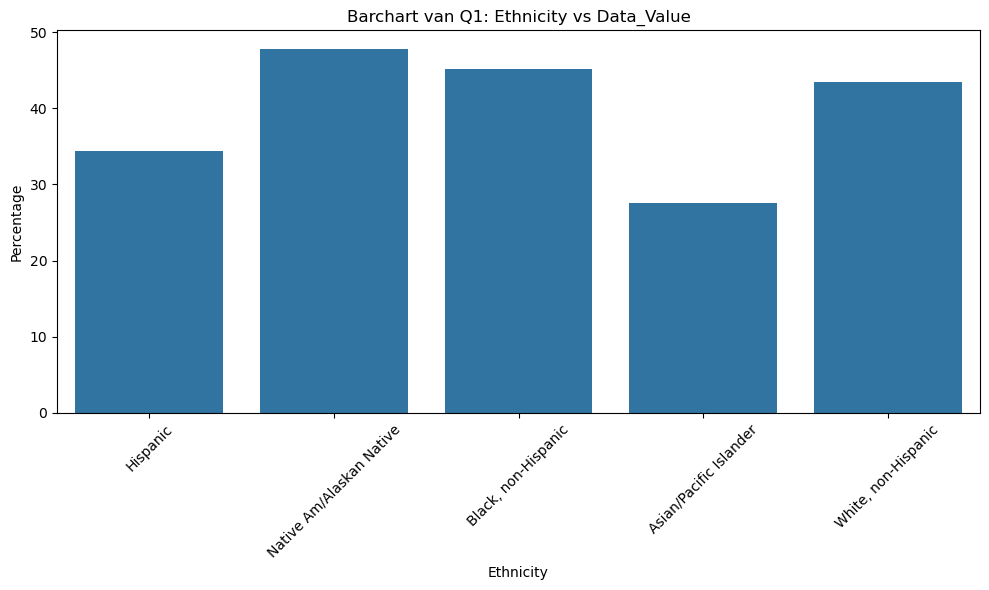

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


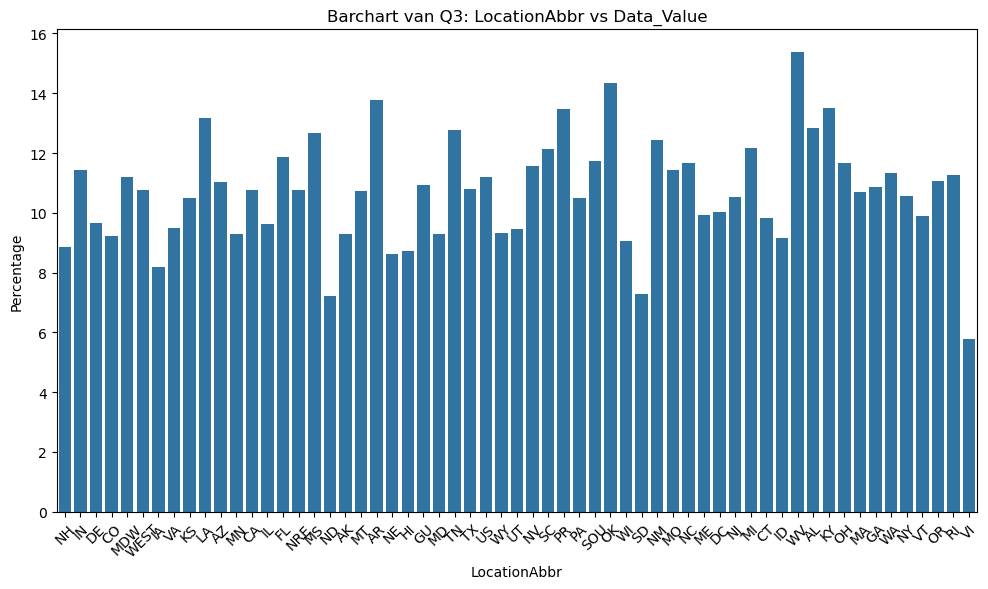

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


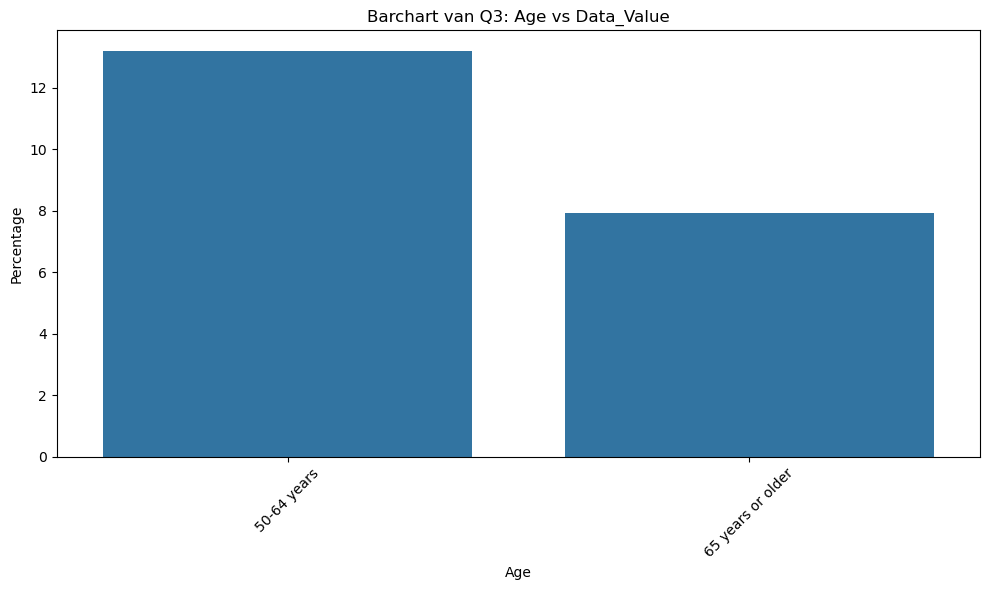

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


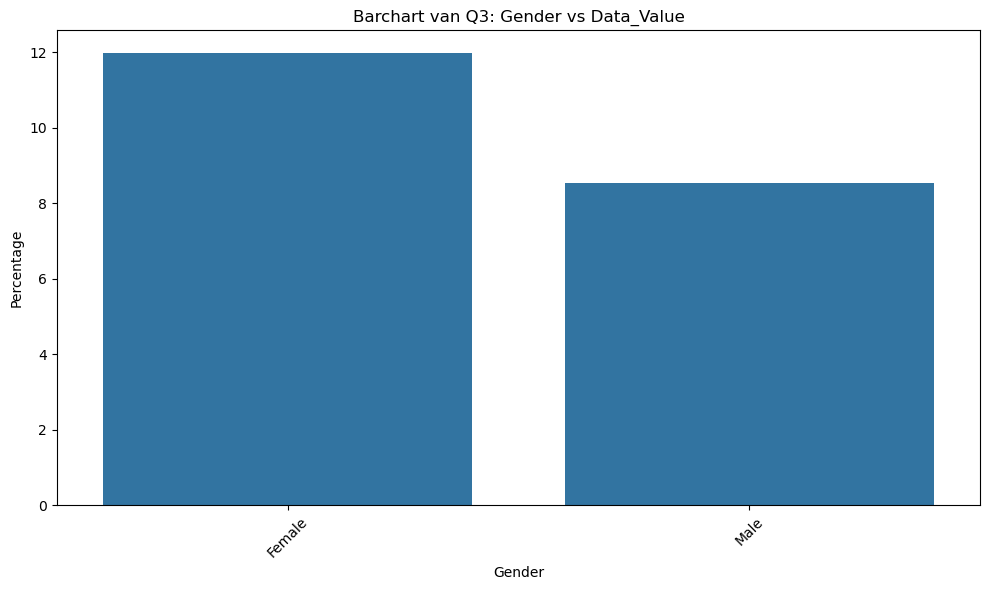

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


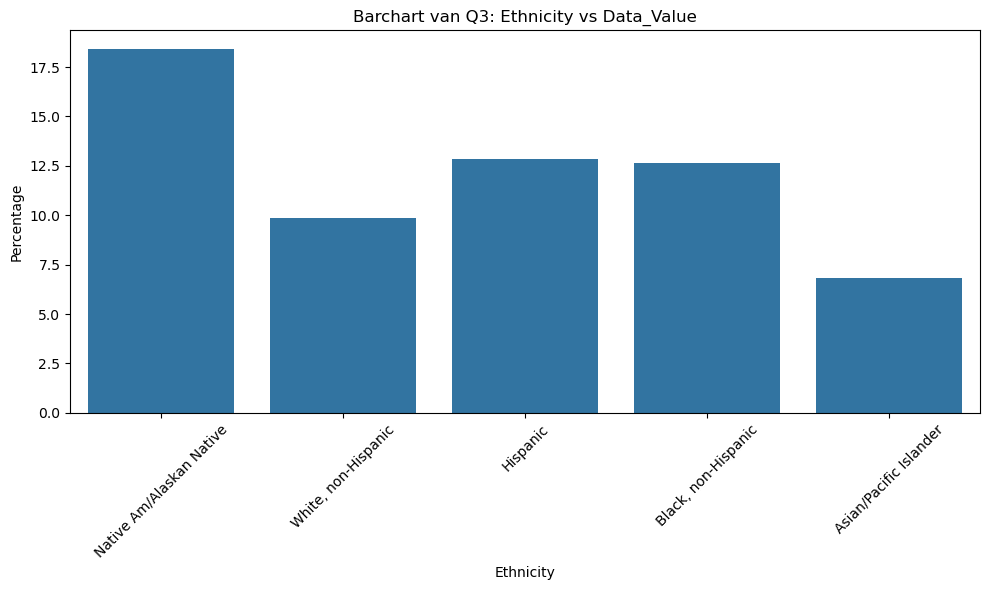

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


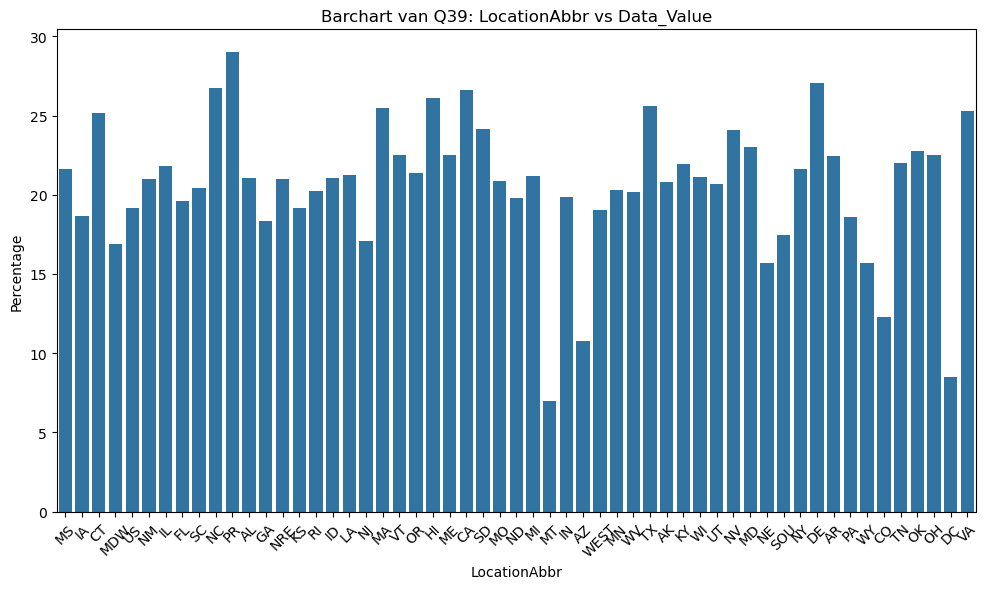

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


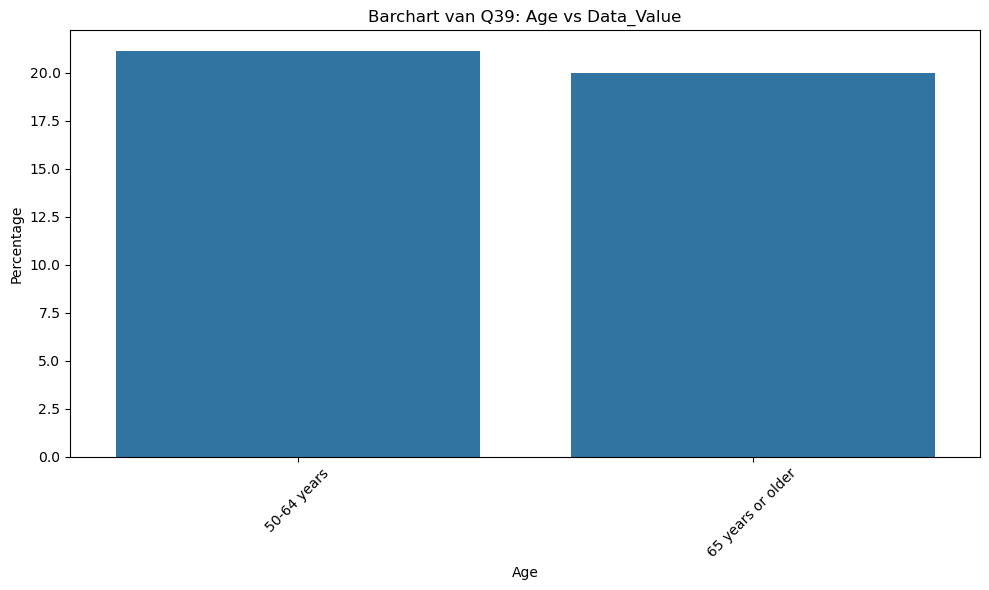

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


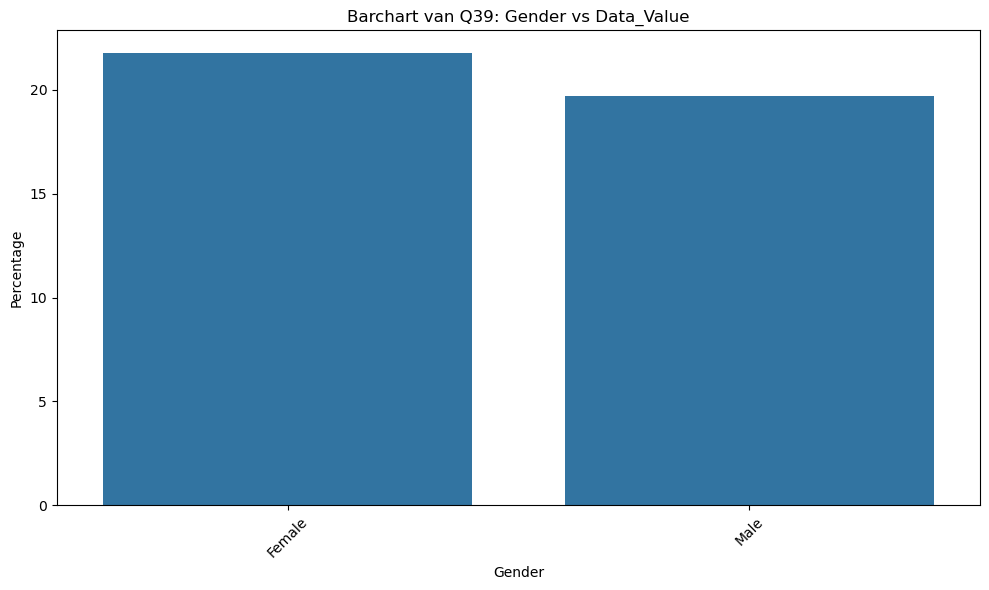

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\3280828908.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)


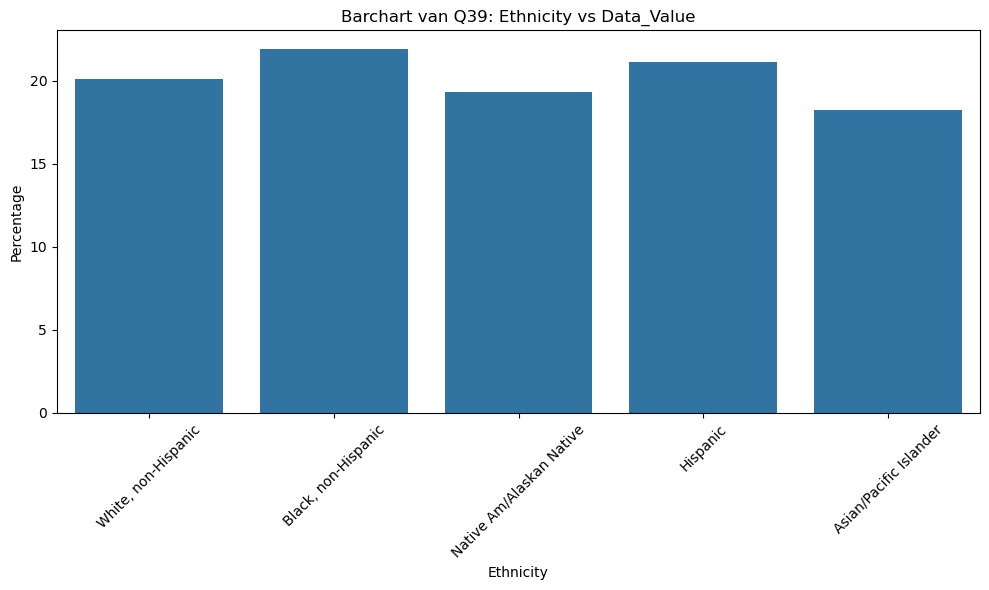

In [21]:
def plot_barcharts(df, questions, x_columns):
    
    for q in questions:
        # Filter the question
        df_q = df[df['QID'] == q].copy()
        
        for x_col in x_columns:
            # Remove rows with NaN in Data_Value or X-axis column
            df_plot = df_q.dropna(subset=['Data_Value', x_col])
            
            if df_plot.empty:
                print(f'Geen data beschikbaar voor {q} met X-as {x_col}.')
                continue
            
            plt.figure(figsize=(10,6))
            sns.barplot(data=df_plot, x=x_col, y='Data_Value', ci=None)
            plt.title(f'Barchart van {q}: {x_col} vs Data_Value')
            plt.ylabel('Percentage')
            plt.xlabel(x_col)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Examples of questions:
questions_to_plot = ['Q1', 'Q3', 'Q39']
x_columns_to_plot = ['LocationAbbr', 'Age', 'Gender', 'Ethnicity']

plot_barcharts(Alzheimers, questions_to_plot, x_columns_to_plot)


C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\4022678185.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_1_q3, x=x_col, y='Data_Value', ci=None)


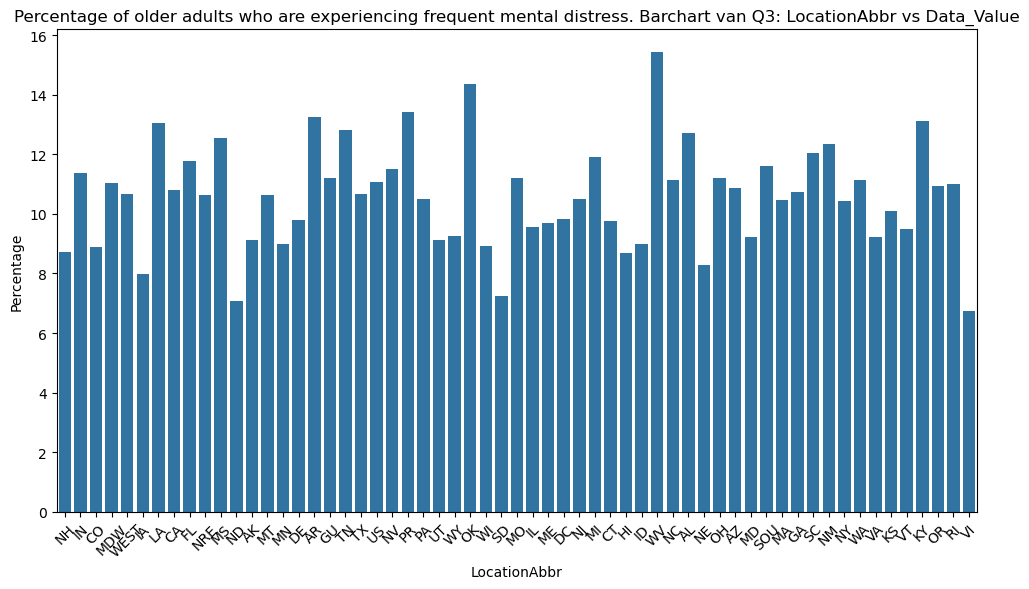

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\4022678185.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_1_q3, x=x_col, y='Data_Value', ci=None)


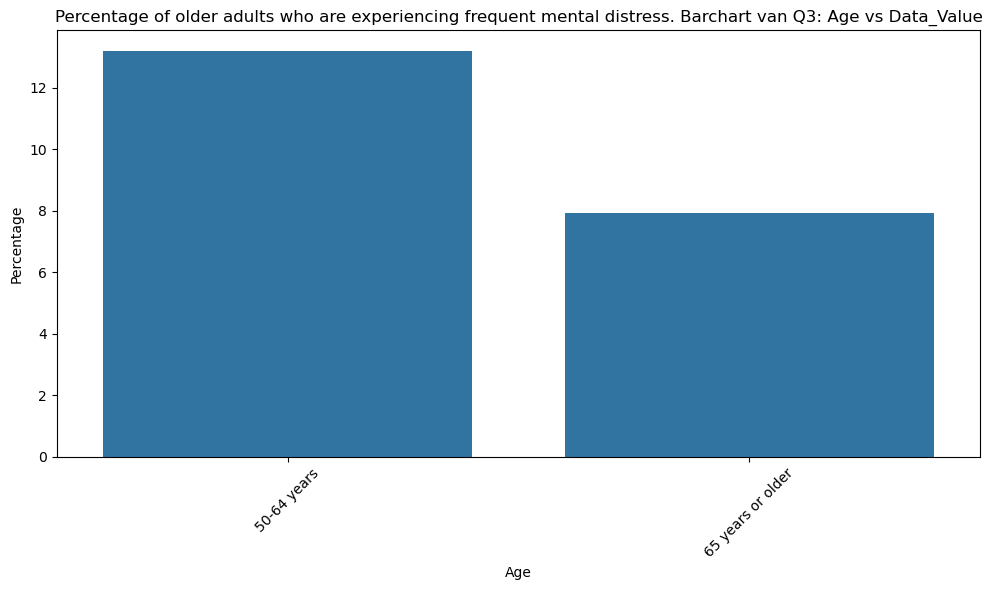

In [22]:
# Filter first Q3 and remove all NaN
df_1_q3 = Alzheimers[Alzheimers['QID'] == 'Q3'].dropna(subset=['Data_Value', 'LocationAbbr', 'Age'])

# List of columns to plot
x_columns = ['LocationAbbr', 'Age']

# For loop for all columns and make a barchart
for x_col in x_columns:
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_1_q3, x=x_col, y='Data_Value', ci=None)
    plt.title(f'Percentage of older adults who are experiencing frequent mental distress. Barchart van Q3: {x_col} vs Data_Value')
    plt.ylabel('Percentage')
    plt.xlabel(x_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



## More distribution Plots about each lifestyle indicator

<Figure size 1000x600 with 0 Axes>

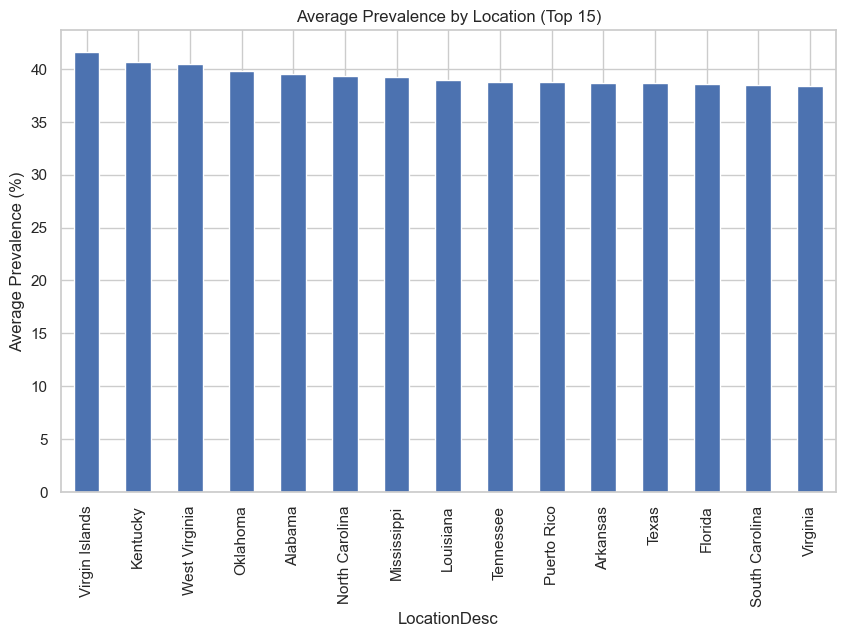

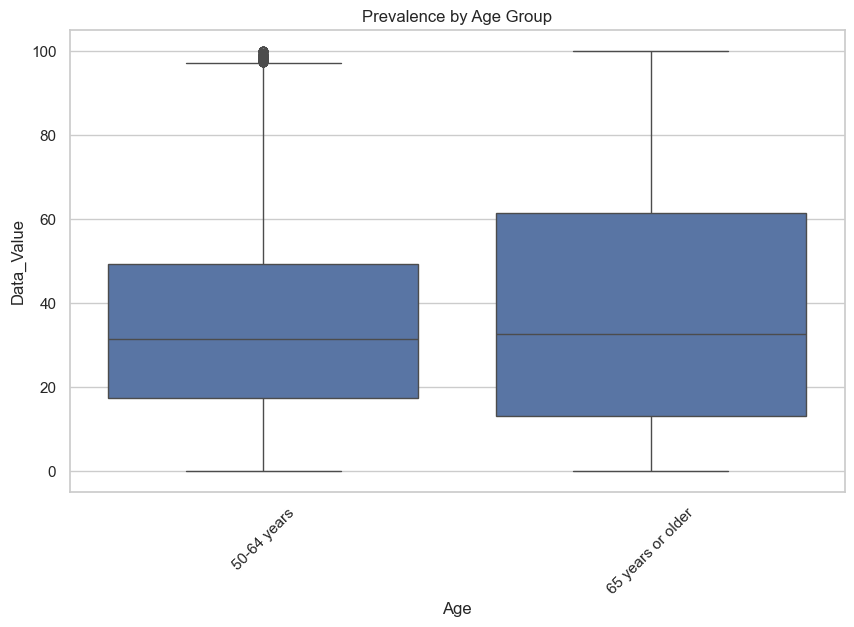

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\1645636560.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=Alzheimers, x="Gender", y="Data_Value", ci="sd")


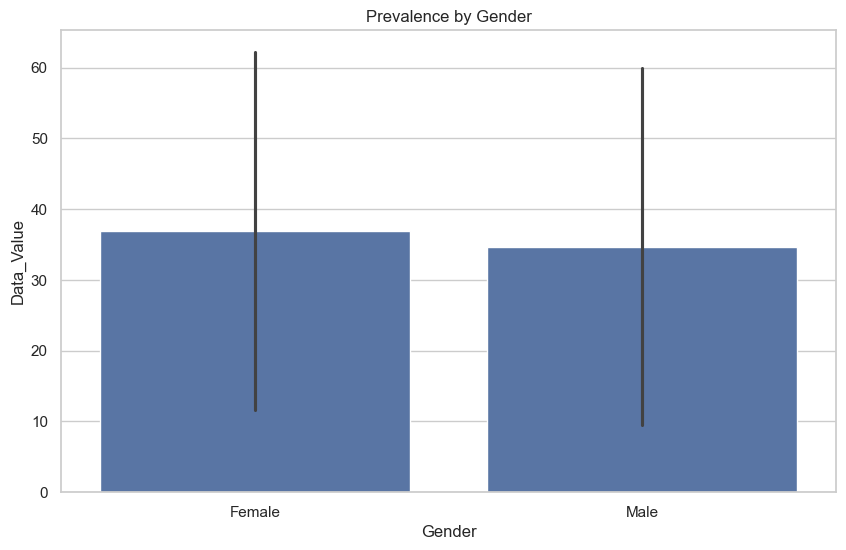

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\1645636560.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=Alzheimers, x="Ethnicity", y="Data_Value", ci="sd")


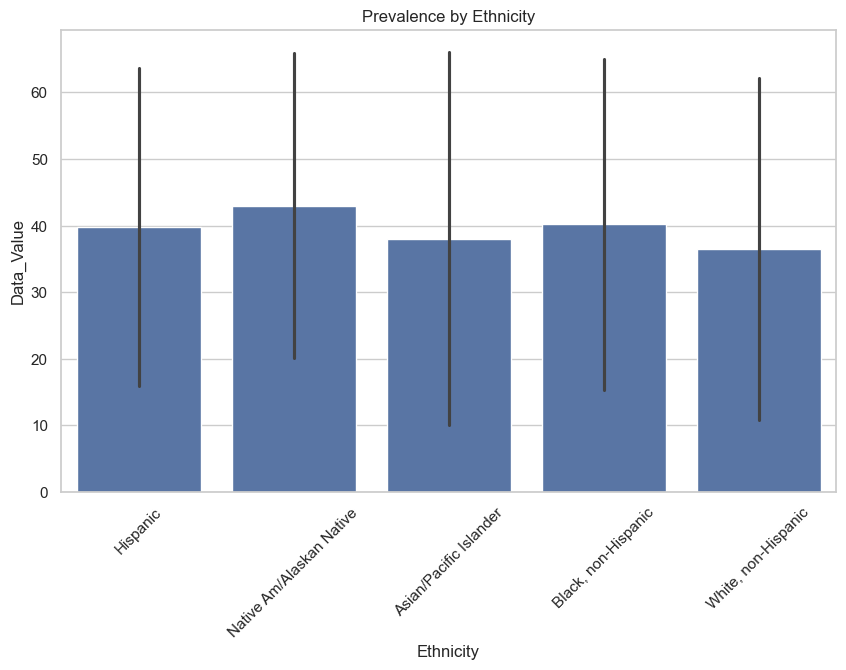

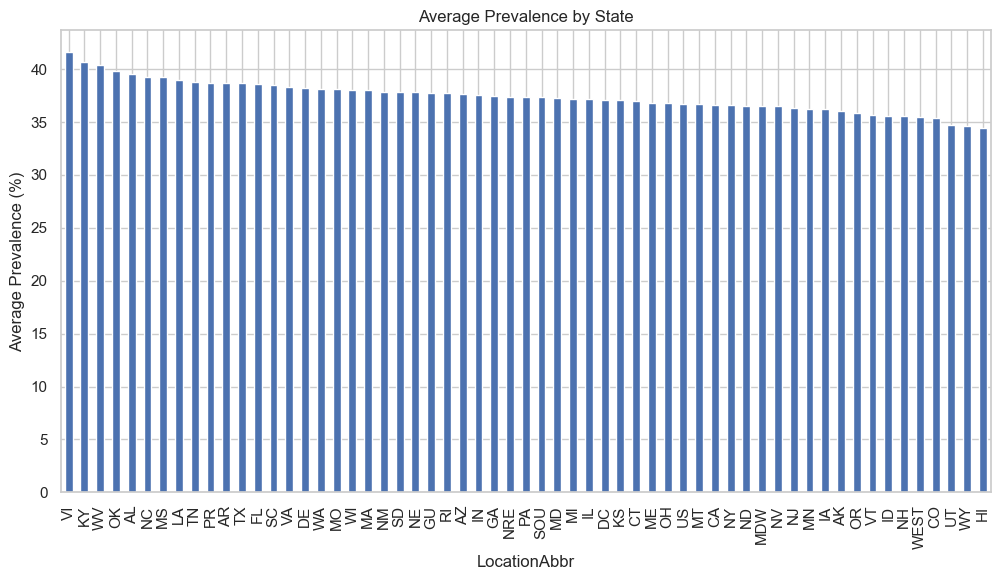

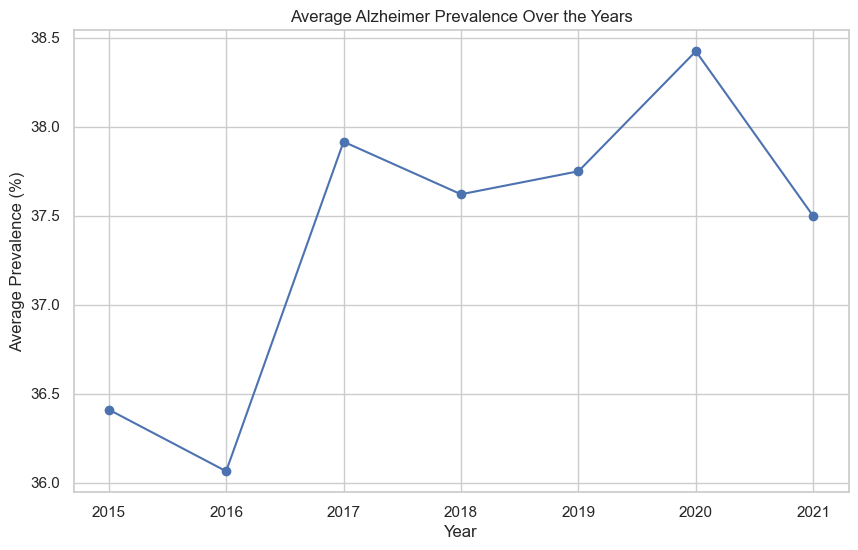

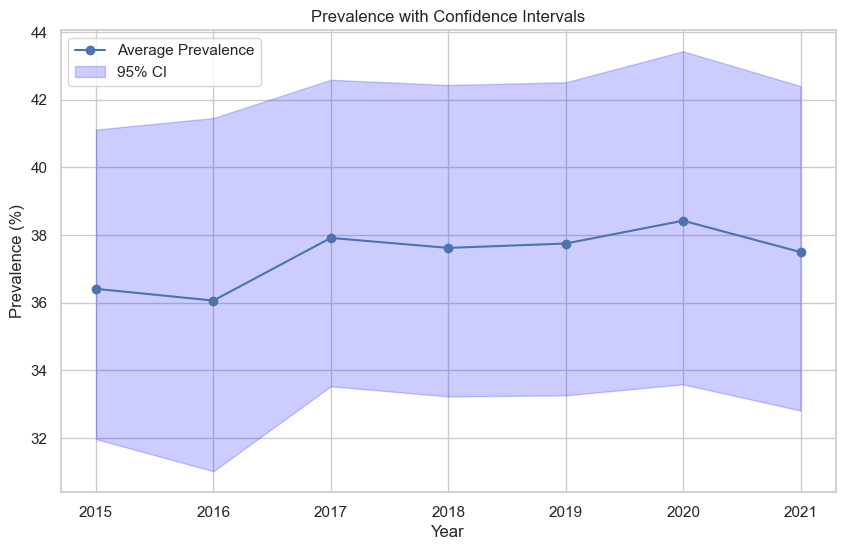

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37336\1645636560.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_prev = Alzheimers.groupby("Age")["Data_Value"].mean()


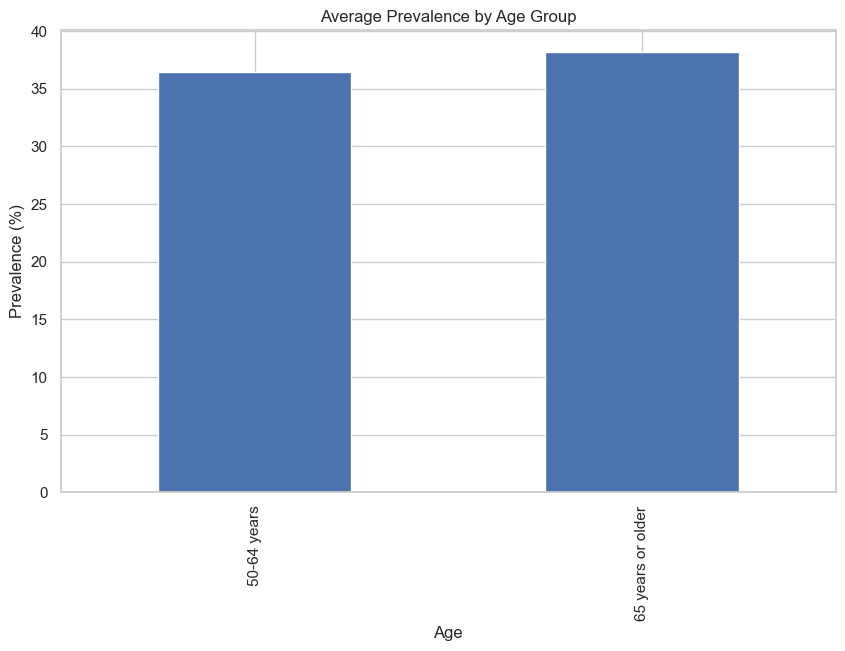

Average Prevalence by Gender:
 Gender
Female    36.904194
Male      34.709825
Name: Data_Value, dtype: float64

Average Prevalence by Ethnicity:
 Ethnicity
Asian/Pacific Islander      38.056350
Black, non-Hispanic         40.202450
Hispanic                    39.768005
Native Am/Alaskan Native    43.012372
White, non-Hispanic         36.481668
Name: Data_Value, dtype: float64


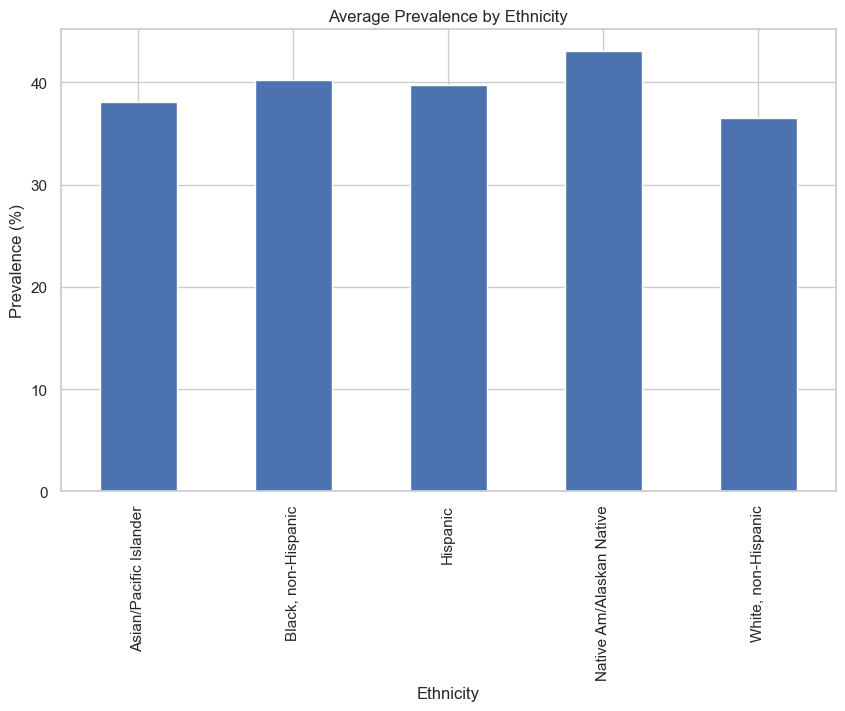

In [23]:
#!!! NOTE: 'Data_Value' is used here
# Looking back, I know this analysis is not right, since data_values are combined for different questions. But I leave it as is for now.


# ==========================
# Basic settings
# ==========================
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# ==========================
# 1. Prevalence Analysis
# ==========================
plt.figure()

# Prevalence by location (average)
prev_location = Alzheimers.groupby("LocationDesc")['Data_Value'].mean().sort_values(ascending=False).head(15)
plt.figure()
prev_location.plot(kind="bar")
plt.title("Average Prevalence by Location (Top 15)")
plt.ylabel("Average Prevalence (%)")
plt.show()

# ==========================
# 2. Demographic Trends
# ==========================
# Age
plt.figure()
sns.boxplot(data=Alzheimers, x="Age", y="Data_Value")
plt.title("Prevalence by Age Group")
plt.xticks(rotation=45)
plt.show()

# Gender
plt.figure()
sns.barplot(data=Alzheimers, x="Gender", y="Data_Value", ci="sd")
plt.title("Prevalence by Gender")
plt.show()

# Ethnicity
plt.figure()
sns.barplot(data=Alzheimers, x="Ethnicity", y="Data_Value", ci="sd")
plt.title("Prevalence by Ethnicity")
plt.xticks(rotation=45)
plt.show()

# ==========================
# 3. Geospatial Mapping (simple: bar plot)
# ==========================
loc_prev = Alzheimers.groupby("LocationAbbr")['Data_Value'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
loc_prev.plot(kind="bar")
plt.title("Average Prevalence by State")
plt.ylabel("Average Prevalence (%)")
plt.show()

# ==========================
# 4. Temporal Trends
# ==========================
year_trend = Alzheimers.groupby("YearStart")['Data_Value'].mean()
plt.figure()
year_trend.plot(marker="o")
plt.title("Average Alzheimer Prevalence Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Prevalence (%)")
plt.show()

# ==========================
# 5. Confidence Interval Analysis
# ==========================
ci_df = Alzheimers.groupby("YearStart")[["Data_Value","Low_Confidence_Limit","High_Confidence_Limit"]].mean()

plt.figure()
plt.plot(ci_df.index, ci_df["Data_Value"], marker="o", label="Average Prevalence")
plt.fill_between(ci_df.index, ci_df["Low_Confidence_Limit"], ci_df["High_Confidence_Limit"], 
                 color="blue", alpha=0.2, label="95% CI")
plt.title("Prevalence with Confidence Intervals")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.legend()
plt.show()

# ==========================
# 6. Age-specific Analysis
# ==========================
age_prev = Alzheimers.groupby("Age")["Data_Value"].mean()
plt.figure()
age_prev.plot(kind="bar")
plt.title("Average Prevalence by Age Group")
plt.ylabel("Prevalence (%)")
plt.show()

# ==========================
# 7. Gender and Ethnicity Insights
# ==========================
gender_prev = Alzheimers.groupby("Gender")["Data_Value"].mean()
print("Average Prevalence by Gender:\n", gender_prev)

ethnicity_prev = Alzheimers.groupby("Ethnicity")["Data_Value"].mean()
print("\nAverage Prevalence by Ethnicity:\n", ethnicity_prev)

plt.figure()
ethnicity_prev.plot(kind="bar")
plt.title("Average Prevalence by Ethnicity")
plt.ylabel("Prevalence (%)")
plt.show()


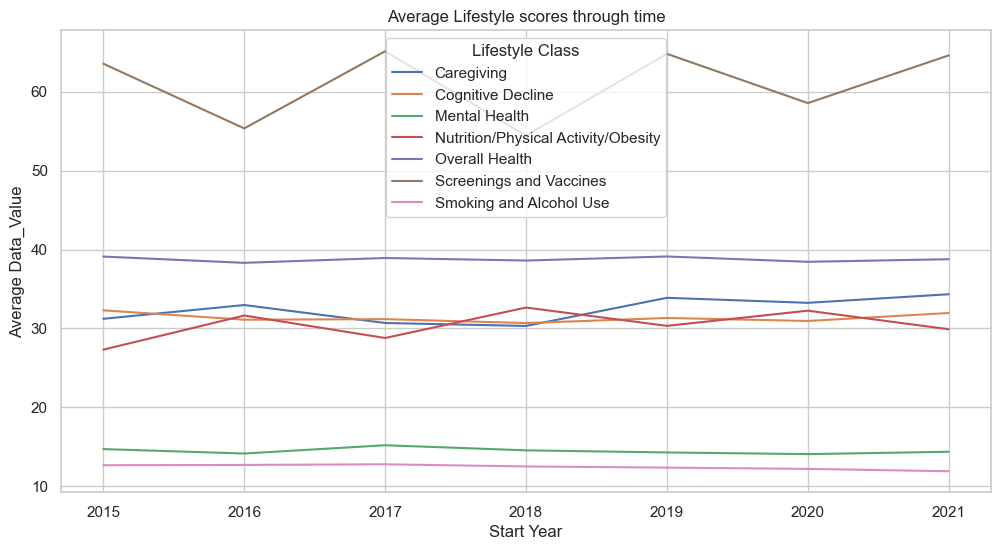

In [26]:
import seaborn as sns

# Average Data_Value per Class
time_data = Alzheimers.groupby(['YearStart', 'Class'])['Data_Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_data, x='YearStart', y='Data_Value', hue='Class')
plt.title("Average Lifestyle scores through time")
plt.xlabel("Start Year")
plt.ylabel("Average Data_Value")
plt.legend(title="Lifestyle Class")
plt.show()


## Let's make a correlation network of all classes and questions (based upon other course MSB1014)

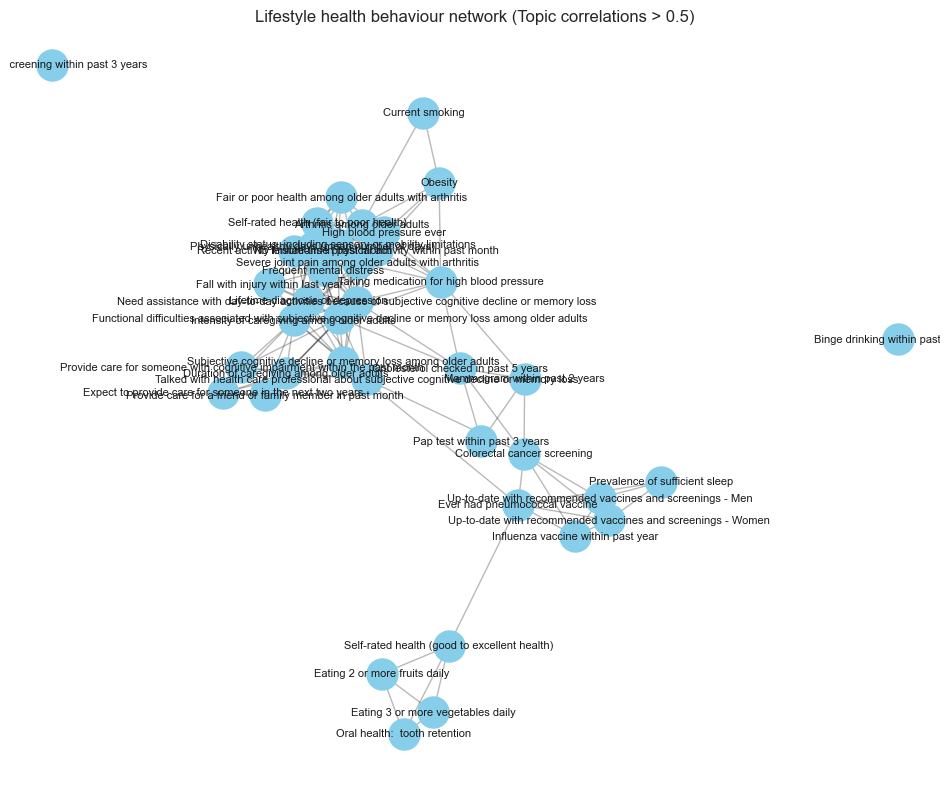

In [ ]:
import networkx as nx

# Average Data_Value per topic
topic_matrix = Alzheimers.pivot_table(index='LocationDesc', columns='Topic', values='Data_Value', aggfunc='mean').fillna(0)

# Correlationmatrix
corr = topic_matrix.corr()

# Build network: edges as correlation > 0.5
G = nx.Graph()
for col in corr.columns:
    G.add_node(col)

for i in corr.columns:
    for j in corr.columns:
        if i != j and corr.loc[i, j] > 0.5:
            G.add_edge(i, j, weight=corr.loc[i, j])

# Plot network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Lifestyle health behaviour network (Topic correlations > 0.5)")
plt.axis("off")
plt.show()


In [29]:
# Try to make it bigger and more readable

import networkx as nx
import plotly.graph_objects as go

# Average Data_Value per Topic
topic_matrix = Alzheimers.pivot_table(index='LocationDesc', columns='Topic', values='Data_Value', aggfunc='mean').fillna(0)

# Correlationmatrix
corr = topic_matrix.corr()

# Build network: edges as correlation > 0.5
G = nx.Graph()
for col in corr.columns:
    G.add_node(col)

for i in corr.columns:
    for j in corr.columns:
        if i != j and corr.loc[i, j] > 0.5:
            G.add_edge(i, j, weight=corr.loc[i, j])

# Layout
pos = nx.spring_layout(G, k=0.5, seed=42)  # k is bigger for more spreiding

# Nodes
node_x = []
node_y = []
hover_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    hover_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=hover_text,
    textposition='top center',
    marker=dict(size=25, color='skyblue', line=dict(width=2, color='DarkSlateGrey'))
)

# Edges
edge_x = []
edge_y = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Figuur
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(
                        text='Health behaviour Network (Topic correlation > 0.5)',
                        font=dict(size=30)
                    ),
                    showlegend=False,
                    hovermode='closest',
                    height=1300, 
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

fig.show()


# Interactive plots


In [ ]:
# Only linegraph

import altair as alt
import ipywidgets as widgets
from IPython.display import display

# Functie om data te filteren, middelen en visualiseren
def visualize_country_data(location, question, df):
    # Filter data
    data_to_viz = df[(df['LocationDesc'] == location) & (df['Question'] == question)]
    
    if data_to_viz.empty:
        print("Geen data beschikbaar voor deze combinatie.")
        return

    # Gemiddelde Data_Value per jaar EN per Question berekenen
    data_to_viz = data_to_viz.groupby(["YearStart", "Question"], as_index=False)["Data_Value"].mean()

    # Lijngrafiek
    chart = alt.Chart(data_to_viz).mark_line(point=True).encode(
        x='YearStart:O',          # discrete jaar-as
        y='Data_Value:Q',         # gemiddelde waarde
        color='Question:N',       # kleur per vraag (ook handig als je ooit meerdere tegelijk wilt plotten)
        tooltip=['YearStart', 'Question', 'Data_Value']
    ).properties(
        width=700,
        height=400,
        title=f"{question} in {location} (gemiddelde per jaar)"
    )

    display(chart)


# Widgets
location_dropdown = widgets.Dropdown(
    options=sorted(Alzheimers['LocationDesc'].dropna().unique()), 
    description='Location:'
)
question_dropdown = widgets.Dropdown(
    options=sorted(Alzheimers['Question'].dropna().unique()), 
    description='Question:'
)

# Interactive output
iout = widgets.interactive_output(visualize_country_data, {
    'location': location_dropdown,
    'question': question_dropdown,
    'df': widgets.fixed(Alzheimers)
})

# Layout
display(widgets.HBox([iout, widgets.VBox([location_dropdown, question_dropdown])]))


In [32]:
# Only boxplot + swarmplot

import altair as alt
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Functie om data te filteren en visualiseren
def visualize_country_data(location, question, df):
    # Filter data
    data_to_viz = df[(df['LocationDesc'] == location) & (df['Question'] == question)].copy()
    
    if data_to_viz.empty:
        print("Geen data beschikbaar voor deze combinatie.")
        return
    
    # Jitter toevoegen als kolom
    rng = np.random.default_rng(0)  # vaste seed voor reproduceerbaarheid
    data_to_viz["jitter"] = rng.uniform(-0.3, 0.3, size=len(data_to_viz))

    # Boxplot
    box = alt.Chart(data_to_viz).mark_boxplot(extent='min-max').encode(
        x='YearStart:O',
        y='Data_Value:Q',
        color=alt.value('steelblue')
    )

    # Swarmplot (punten met jitter)
    points = alt.Chart(data_to_viz).mark_circle(size=70, opacity=0.5).encode(
        x=alt.X('YearStart:O', axis=alt.Axis(title="Year")),
        y=alt.Y('Data_Value:Q', axis=alt.Axis(title="Data Value")),
        tooltip=['YearStart', 'Data_Value']
    ).transform_calculate(
        # jitter toevoegen aan positie in pixels
        jitter='(random() - 0.5) * 0.6'
    ).encode(
        x=alt.X('YearStart:O', axis=alt.Axis(title="Year")),
        xOffset='jitter:Q'   # <-- Altair v5 ondersteunt nu xOffset
    )

    chart = (box + points).properties(
        width=700,
        height=400,
        title=f"{question} in {location} (Boxplot + Swarm per jaar)"
    )

    display(chart)


# Widgets
location_dropdown = widgets.Dropdown(
    options=sorted(Alzheimers['LocationDesc'].dropna().unique()), 
    description='Location:'
)
question_dropdown = widgets.Dropdown(
    options=sorted(Alzheimers['Question'].dropna().unique()), 
    description='Question:'
)

# Interactive output
iout = widgets.interactive_output(visualize_country_data, {
    'location': location_dropdown,
    'question': question_dropdown,
    'df': widgets.fixed(Alzheimers)
})

# Layout
display(widgets.HBox([iout, widgets.VBox([location_dropdown, question_dropdown])]))


# Prediction (10-20 min)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# only wanted columns
cols = ['YearStart','LocationDesc','Gender','Ethnicity','Age','Class','Topic','Data_Value']
Alzheimers_pred_1 = Alzheimers[cols].dropna(subset=['Data_Value'])

# Age convert to numeric
def extract_age(age_str):
    if pd.isna(age_str): return np.nan
    digits = ''.join([c if c.isdigit() else ' ' for c in str(age_str)]).split()
    return int(digits[0]) if digits else np.nan
Alzheimers_pred_1['AgeNum'] = Alzheimers_pred_1['Age'].apply(extract_age)

# Split data: with and without Age
df_with_age = Alzheimers_pred_1.dropna(subset=['AgeNum'])
df_missing_age = Alzheimers_pred_1[Alzheimers_pred_1['AgeNum'].isna()]

# Features + target
X = df_with_age[['LocationDesc','Gender','Ethnicity','Class','Topic','YearStart']]
y = df_with_age['AgeNum']

# OneHotEncoding
categorical = ['LocationDesc','Gender','Ethnicity','Class','Topic']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical)],
    remainder='passthrough'
)

# Random Forest pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train/test split (step 1: trainen on records with Age)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

print("Model getraind op records met Age.")

# Test on known rows
sample_pred = model.predict(X_test[:5])
print("\nVoorbeeld voorspellingen:")
print("Echte leeftijden:", y_test[:5].tolist())
print("Voorspelde leeftijden:", [round(p,1) for p in sample_pred])

# Step 2: predict for rows without age
if not df_missing_age.empty:
    X_missing = df_missing_age[['LocationDesc','Gender','Ethnicity','Class','Topic','YearStart']]
    df_missing_age['Predicted_Age'] = model.predict(X_missing)
    print(f"\nAantal voorspelde ontbrekende leeftijden: {len(df_missing_age)}")
    print(df_missing_age[['LocationDesc','Gender','Ethnicity','Class','Topic','Predicted_Age']].head())
else:
    print("\nGeen records met ontbrekende Age gevonden.")


Model getraind op records met Age.

Voorbeeld voorspellingen:
Echte leeftijden: [50.0, 65.0, 50.0, 50.0, 65.0]
Voorspelde leeftijden: [62.4, 53.1, 56.5, 62.1, 53.2]

Aantal voorspelde ontbrekende leeftijden: 60271
   LocationDesc  Gender            Ethnicity  \
2       Alabama  Female                  NaN   
5       Alabama    Male                  NaN   
6       Alabama     NaN                  NaN   
20      Alabama     NaN  White, non-Hispanic   
22      Alabama     NaN  Black, non-Hispanic   

                                  Class                          Topic  \
2   Nutrition/Physical Activity/Obesity  Eating 2 or more fruits daily   
5   Nutrition/Physical Activity/Obesity  Eating 2 or more fruits daily   
6   Nutrition/Physical Activity/Obesity  Eating 2 or more fruits daily   
20  Nutrition/Physical Activity/Obesity  Eating 2 or more fruits daily   
22  Nutrition/Physical Activity/Obesity  Eating 2 or more fruits daily   

    Predicted_Age  
2       52.880000  
5       56.9

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_37908\2750876746.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Model trained op records of Age.

Mean Absolute Error op testset: 10.91 jaar

 Example predictions:
Real ages: [50.0, 65.0, 50.0, 50.0, 65.0]
Predicted ages: [62.4, 53.1, 56.5, 62.1, 53.2]

Top 10 most important features:
remainder__YearStart                                          0.185087
cat__Gender_nan                                               0.023679
cat__Gender_Male                                              0.022156
cat__Gender_Female                                            0.022126
cat__Ethnicity_White, non-Hispanic                            0.015799
cat__Ethnicity_nan                                            0.015545
cat__Topic_Self-rated health (good to excellent health)       0.012292
cat__Topic_Self-rated health (fair to poor health)            0.011813
cat__LocationDesc_Midwest                                     0.011332
cat__Topic_Physically unhealthy days (mean number of days)    0.011186
dtype: float64


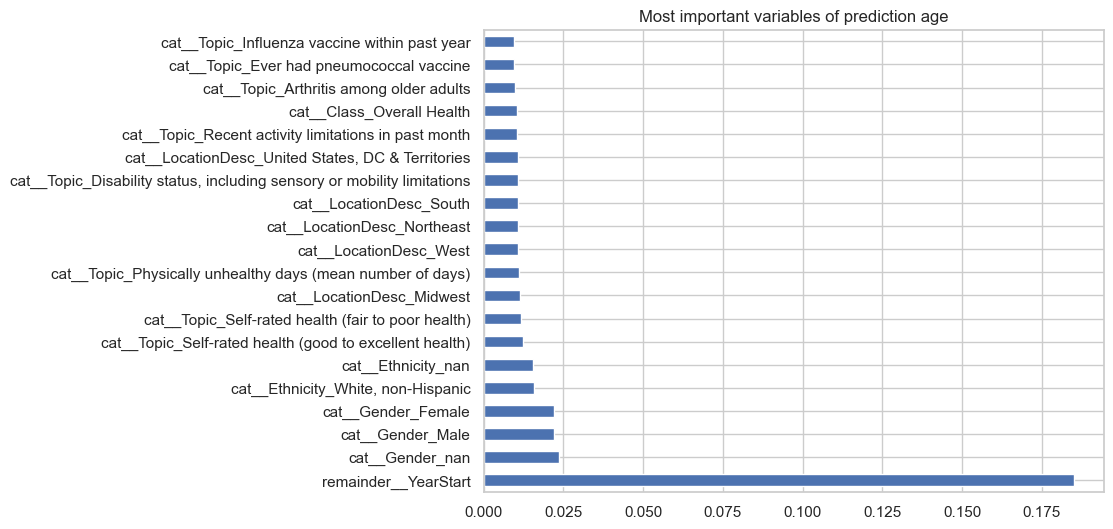

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Only wanted columns
cols = ['YearStart','LocationDesc','Gender','Ethnicity','Age','Class','Topic','Data_Value']
Alzheimers_pred_2 = Alzheimers[cols].dropna(subset=['Data_Value'])

# Age convert to numeric
def extract_age(age_str):
    if pd.isna(age_str): return np.nan
    digits = ''.join([c if c.isdigit() else ' ' for c in str(age_str)]).split()
    return int(digits[0]) if digits else np.nan
Alzheimers_pred_2['AgeNum'] = Alzheimers_pred_2['Age'].apply(extract_age)

# Split data: with and without Age
df_with_age = Alzheimers_pred_2.dropna(subset=['AgeNum'])
df_missing_age = Alzheimers_pred_2[Alzheimers_pred_2['AgeNum'].isna()]

# Features + target
X = df_with_age[['LocationDesc','Gender','Ethnicity','Class','Topic','YearStart']]
y = df_with_age['AgeNum']

# OneHotEncoding
categorical = ['LocationDesc','Gender','Ethnicity','Class','Topic']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical)],
    remainder='passthrough'
)

# Random Forest pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train/test split (stwp 1: train on records with Age)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

print("Model trained op records of Age.")

# === Validation on testset ===
y_pred_test = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"\nMean Absolute Error op testset: {mae:.2f} jaar")

# Example predictions
print("\n Example predictions:")
print("Real ages:", y_test[:5].tolist())
print("Predicted ages:", [round(p,1) for p in y_pred_test[:5]])

# === Feature importance ===
importances = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("\nTop 10 most important features:")
print(feat_imp.head(10))

# Plot feature importance
feat_imp.head(20).plot(kind='barh', figsize=(8,6))
plt.title("Most important variables of prediction age")
plt.show()


Model getraind op records met Age.

Mean Absolute Error op testset: 8.18 jaar

 Example predictions:
Real ages: [50.0, 65.0, 50.0, 50.0, 65.0]
Predicted ages: [58.5, 57.7, 56.5, 59.3, 56.9]

Top 10 most important features:
cat__Gender_nan                                                            0.028977
cat__Gender_Female                                                         0.028391
cat__Gender_Male                                                           0.027892
cat__Ethnicity_White, non-Hispanic                                         0.020672
cat__Ethnicity_nan                                                         0.020245
cat__LocationDesc_Minnesota                                                0.013200
cat__Topic_Arthritis among older adults                                    0.012190
cat__Topic_Ever had pneumococcal vaccine                                   0.012179
cat__Topic_Self-rated health (good to excellent health)                    0.012077
cat__Topic_Disability

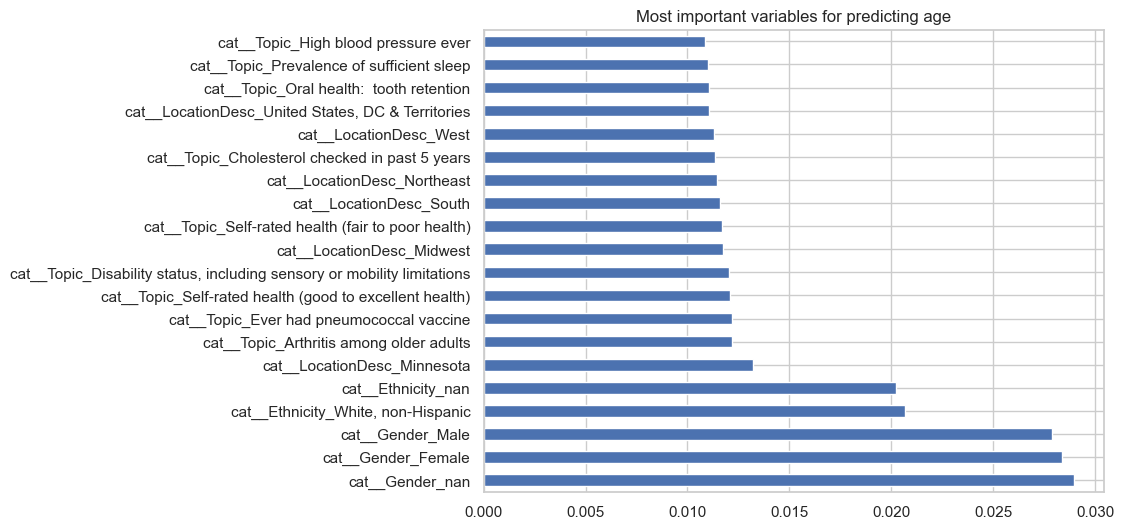

In [ ]:
# I saw that 'remainder_YearStart' was very high, so I will try again without YearStart

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


# Only wanted columns
cols = ['LocationDesc','Gender','Ethnicity','Age','Class','Topic','Data_Value']
Alzheimers_pred_3 = Alzheimers[cols].dropna(subset=['Data_Value'])

# Age convert to numeric
def extract_age(age_str):
    if pd.isna(age_str): return np.nan
    digits = ''.join([c if c.isdigit() else ' ' for c in str(age_str)]).split()
    return int(digits[0]) if digits else np.nan
Alzheimers_pred_3['AgeNum'] = Alzheimers_pred_3['Age'].apply(extract_age)

# Split data: with and without Age
df_with_age = Alzheimers_pred_3.dropna(subset=['AgeNum'])
df_missing_age = Alzheimers_pred_3[Alzheimers_pred_3['AgeNum'].isna()]

# Features + target
X = df_with_age[['LocationDesc','Gender','Ethnicity','Class','Topic']]
y = df_with_age['AgeNum']

# OneHotEncoding
categorical = ['LocationDesc','Gender','Ethnicity','Class','Topic']
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown='ignore'), categorical)],
    remainder='passthrough'
)

# Random Forest pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train/test split (step 1: train on records with Age)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

print("Model getraind op records met Age.")

# === Validation on testset ===
y_pred_test = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"\nMean Absolute Error op testset: {mae:.2f} jaar")

# Example predictions
print("\n Example predictions:")
print("Real ages:", y_test[:5].tolist())
print("Predicted ages:", [round(p,1) for p in y_pred_test[:5]])

# === Feature importance ===
importances = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("\nTop 10 most important features:")
print(feat_imp.head(10))

# Plot feature importance
feat_imp.head(20).plot(kind='barh', figsize=(8,6))
plt.title("Most important variables for predicting age")
plt.show()
